In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from Functions import *

In [4]:
pos = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_POS_CASH_balance.csv')

In [5]:
pos.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


# Pre check overall Dataframe

In [12]:
pos_check = pre_check_tool(pos)
pos_check.split_data()

In [17]:
# Check null percent
pos_check.check_per_null()

,number_missing,percent_missing
SK_ID_PREV,0,0.000000
MONTHS_BALANCE,0,0.000000
CNT_INSTALMENT,21863,0.255906
CNT_INSTALMENT_FUTURE,21878,0.256081
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000
SK_ID_CURR,0,0.000000


In [18]:
# find cols that have null > 90%
print(pos_check.find_null_cols(0.9))

Index([], dtype='object')


NO COLUMNS HAVE NULL VALUES > 90% -> SO WE'RE KEEPING THE DATASET AS IT IS FOR NOW

In [19]:
#duplicate check
pos.duplicated().sum()

0

In [20]:
# valid value
## Num data
pos_check.check_value_num()
print('\n\n\n')

## cat data
pos_check.check_value_cat()

SK_ID_PREV  has     >0 8543375,  =0 0  ,   <0 0,    nan: 0,   other values: 0
MONTHS_BALANCE  has     >0 0,  =0 0  ,   <0 8543375,    nan: 0,   other values: 0
CNT_INSTALMENT  has     >0 8521512,  =0 0  ,   <0 0,    nan: 21863,   other values: 0
CNT_INSTALMENT_FUTURE  has     >0 7499563,  =0 1021934  ,   <0 0,    nan: 21878,   other values: 0
SK_DPD  has     >0 259107,  =0 8284268  ,   <0 0,    nan: 0,   other values: 0
SK_DPD_DEF  has     >0 99110,  =0 8444265  ,   <0 0,    nan: 0,   other values: 0
SK_ID_CURR  has     >0 8543360,  =0 15  ,   <0 0,    nan: 0,   other values: 0






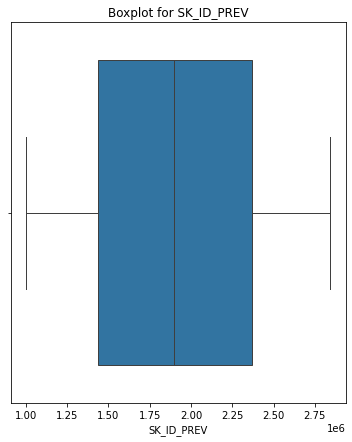

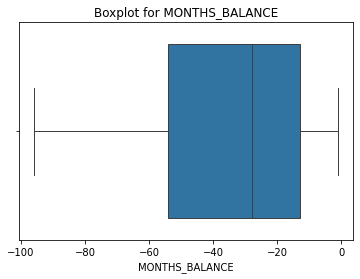

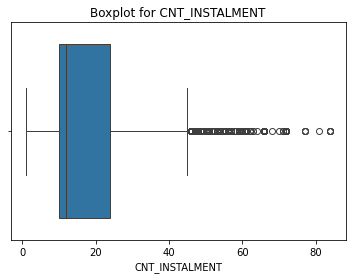

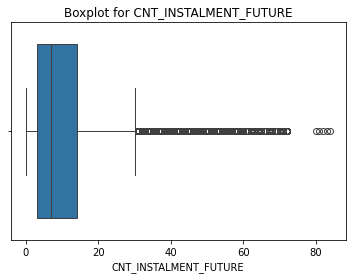

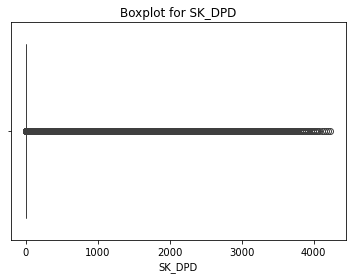

In [21]:
# Outliers 
pos_check.show_outliers()

In [ ]:
pos_check.dist_catchart()

'Categorical DF is not available'

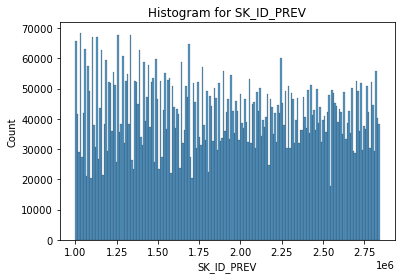

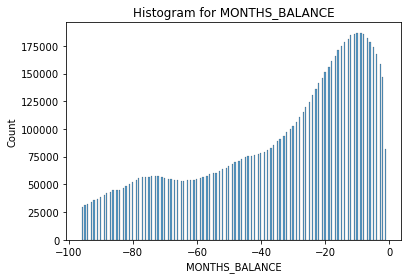

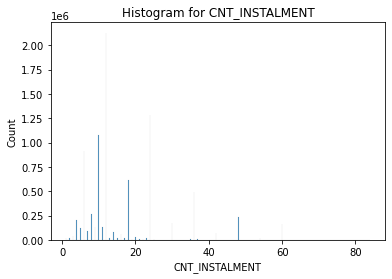

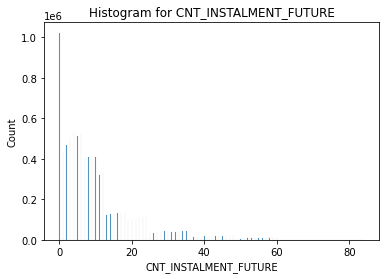

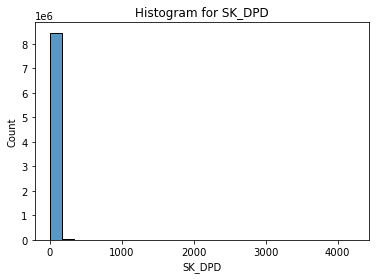

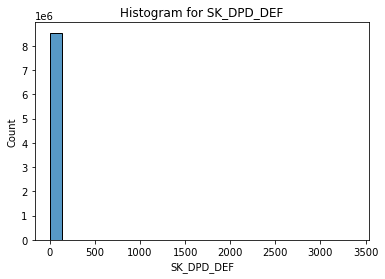

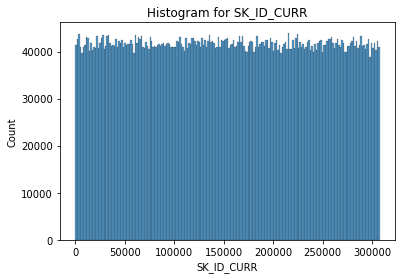

In [ ]:
pos_check.dist_numchart()

# Data Exploration

# EDA Internal

In [6]:
# tao cot de kiem tra so lan bi qua han khi thanh toan khoan vay
def check_over_due(x):
    if x['SK_DPD'] > 0 and x['SK_DPD_DEF'] > 0:
        return 1
    else:
        return 0

pos['over_due'] =  pos.apply(check_over_due,axis= 1)

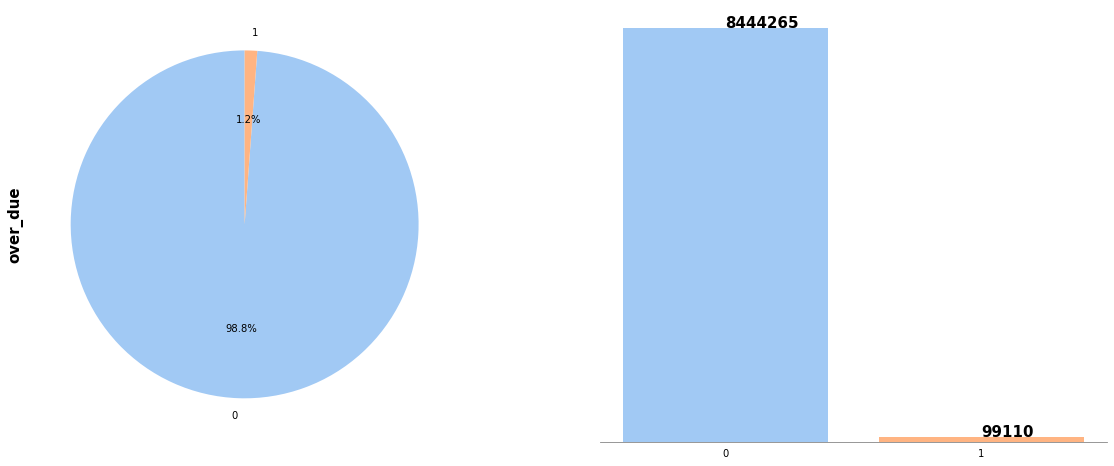

In [7]:
obj1 = Univariate_Analysis(df= pos, col= 'over_due', num= False)
obj1.visualize()

+ From 

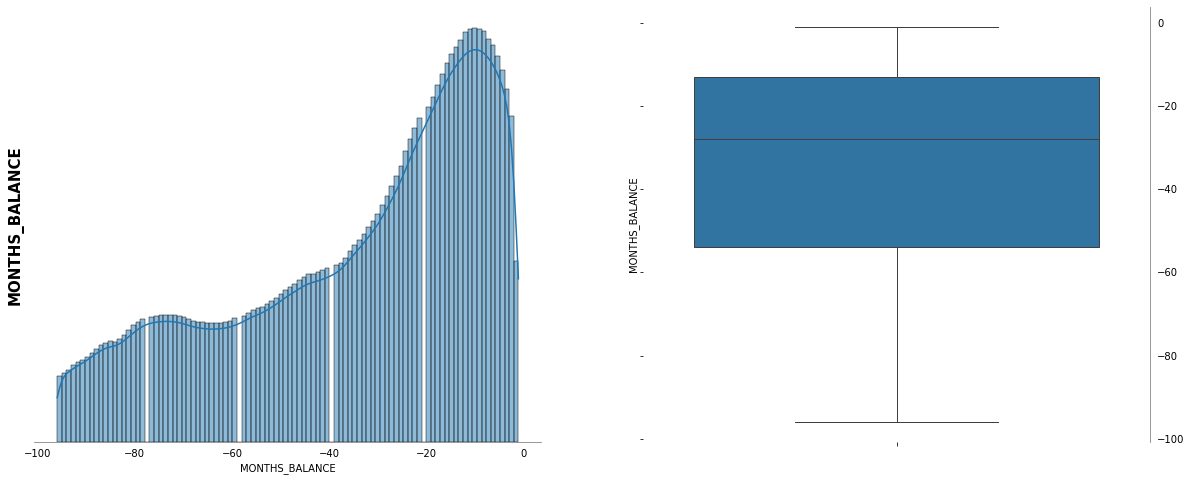

In [6]:
obj2 = Univariate_Analysis(df= pos , col= 'MONTHS_BALANCE', num= True)
obj2.visualize()

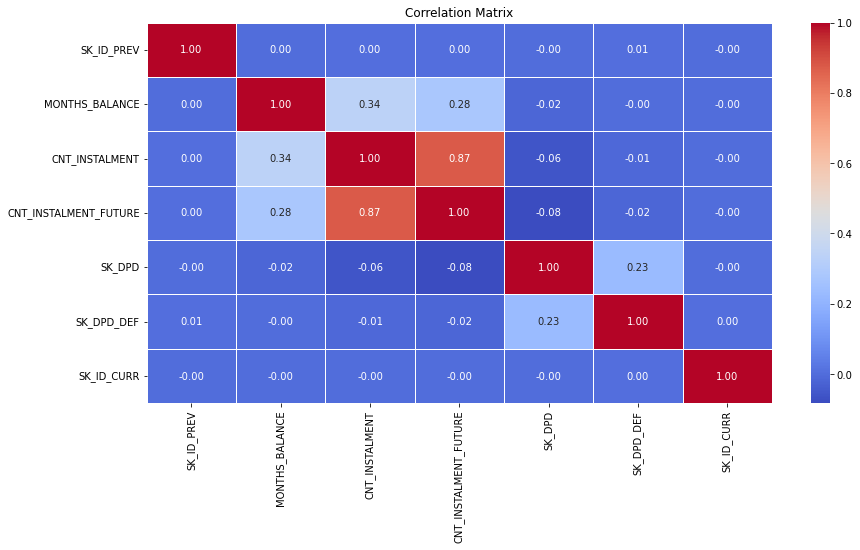

In [13]:
num = pos_check.numdf
cat = pos_check.catdf
# Correlation
draw_corr(num)

### Features that have high correlation: 
* CNT_INSTALMENT - CNT_INSTALMENT_FUTURE

# EDA External

In [ ]:
app_train = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv')
app_train = app_train[['SK_ID_CURR','TARGET']]

In [ ]:
merge_table = pd.merge(pos,app_train,on='SK_ID_CURR',how='left')
merge_table.head()

In [ ]:
num_data.columns

In [ ]:
for col in num_data.iloc[:,1:5]:
    fig,ax = plt.subplots(1,2,figsize =(10,7))
    class0 = merge_table[merge_table['TARGET']==0][col]
    class1 = merge_table[merge_table['TARGET']==1][col]
    ax[0].hist(class0,bins = 200,label = 0)
    ax[1].hist(class1,bins = 200,color = 'red',label= 1)
    ax[0].legend()
    ax[1].legend()
    plt.title(f'Histogram for {col} and TARGET')